In [1]:
import os.path as op
import numpy as np
import mne
from matplotlib import pyplot as plt
from matplotlib.pyplot import MultipleLocator
import pandas as pd
from mne.time_frequency import tfr_morlet, psd_multitaper, psd_welch
from copy import deepcopy
from mne.preprocessing import create_ecg_epochs, create_eog_epochs, read_ica
import sys
from langouEEG import *
import pickle
from mne.viz import plot_topomap

result_dir = "/data/home/viscent/Light/result"

init_prog()
rel_powers_4R, rel_powers_RF, rel_powers_4F = np.empty([0,64]), np.empty([0,64]), np.empty([0,64])
# sub_list = [1,2,3,7,8]
sub_list = range(1,21)
for i in sub_list:
    subject_name = i
    if subject_name<10:
        subject_name='S0'+str(subject_name)
    else:
        subject_name='S'+str(subject_name)
    with open(dataRoot+'/clean_data_av/'+subject_name+'_clean.lgeeg','rb') as f:
        raw=pickle.load(f)
    raw = initLayout(raw)
    events, event_dict=extractEvents(raw)
    picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False,
                        exclude='bads')
    epoch_RR,epoch_RF,epoch_4R,epoch_4F = extractEpochs_id(raw,events,picks, 
    tmin_rest = 60,tmax_rest = 120,tmin_flick = 3,tmax_flick = 30)
    epochs = epoch_RR,epoch_RF,epoch_4R,epoch_4F

    
    power_all_R, power_target_R, power_all_F, power_target_F = get_allch_abs_power(epoch_4R, epoch_4F, f_bottom = .1, f_low = 39.0, f_high = 41.0, f_top = 100.0, sfreq=500.0)
    rel_power_R = cal_rel_power(power_target_R, power_all_R)
    rel_powers_4R = np.insert(rel_powers_4R, 0, values=rel_power_R, axis=0)
    rel_power_F = cal_rel_power(power_target_F, power_all_F)
    rel_powers_4F = np.insert(rel_powers_4F, 0, values=rel_power_F, axis=0)

    power_all_R, power_target_R, power_all_F, power_target_F = get_allch_abs_power(epoch_RR, epoch_RF, f_bottom = .1, f_low = 39.0, f_high = 41.0, f_top = 100.0, sfreq=500.0)
    rel_power_F_ran = cal_rel_power(power_target_F, power_all_F)
    rel_powers_RF = np.insert(rel_powers_RF, 0, values=rel_power_F_ran, axis=0)
    # save_rel_powers()



Used Annotations descriptions: ['11', '12', '8', '9']
{'11': 1, '12': 2, '8': 3, '9': 4}
Used Annotations descriptions: ['11', '12', '8', '9']
Not setting metadata
Not setting metadata
3 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 3 events and 13501 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
3 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 3 events and 30001 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
3 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 3 events and 30001 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
3 matching events found
Applying 

In [2]:
print(np.shape(rel_power_R))
print(np.shape(rel_power_F_ran))
print(np.shape(rel_power_F))

print(np.shape(rel_powers_4R))
print(np.shape(rel_powers_4F))
print(np.shape(rel_powers_RF))
rel_powers_4R = np.mean(rel_powers_4R, axis=0)
rel_powers_4F = np.mean(rel_powers_4F, axis=0)
rel_powers_RF = np.mean(rel_powers_RF, axis=0)
print(np.shape(rel_powers_4R))
print(np.shape(rel_powers_4F))
print(np.shape(rel_powers_RF))

(64,)
(64,)
(64,)
(4, 64)
(4, 64)
(4, 64)
(64,)
(64,)
(64,)


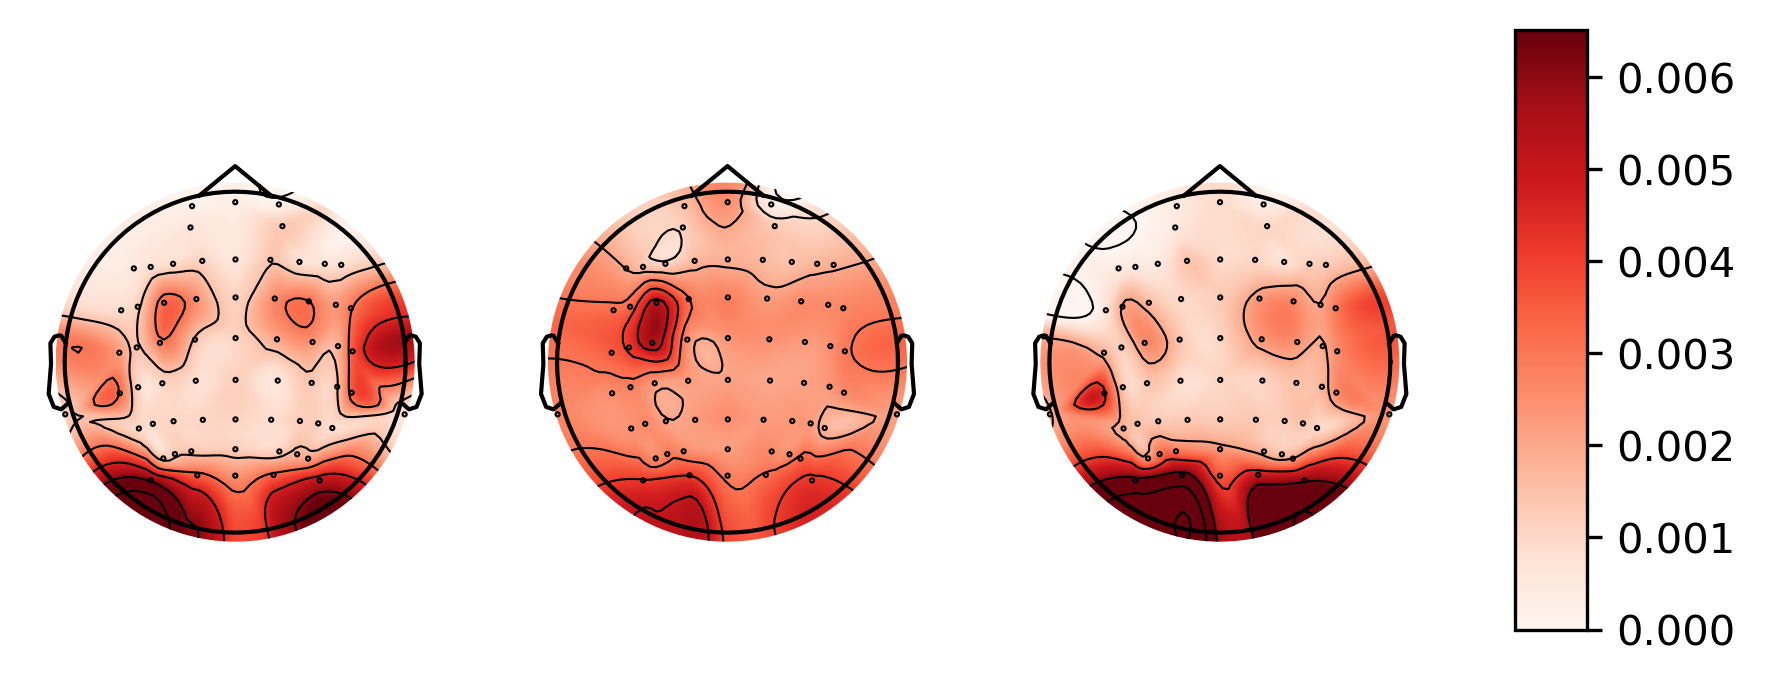

In [3]:
fig, axis = plt.subplots(1, 3, dpi=300)

im,cm = plot_topomap(rel_powers_4R, epoch_4F.info,vmax=np.max(rel_powers_4F), axes=axis[0], show=False)
# axis[0].set_title('Rest state',fontsize=8)
im,cm = plot_topomap(rel_powers_RF, epoch_4F.info,vmax=np.max(rel_powers_4F), axes=axis[1], show=False)
# axis[1].set_title('Random frequency flicker',fontsize=8)
im,cm = plot_topomap(rel_powers_4F, epoch_4F.info,vmax=np.max(rel_powers_4F), axes=axis[2], show=False)
# axis[2].set_title('40 Hz light flicker',fontsize=8)
ax_x_start = 0.95
ax_x_width = 0.04
ax_y_start = 0.3
ax_y_height = 0.5
cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
clb = fig.colorbar(im, cax=cbar_ax)
# clb.ax.set_title('Percent power',fontsize=8) # title on top of colorbar
fig.savefig(result_dir + '/Percent_topomap/Percent_topomap.svg')
fig.savefig(result_dir + '/Percent_topomap/Percent_topomap.png')

In [4]:
""" import numpy as np

x = np.empty([0,3])
a = [1,2,3] 
b = [0,0,0]
c = [2,2,2]
x = np.insert(x, 0, values=a, axis=0)
x = np.insert(x, 0, values=b, axis=0)
x = np.insert(x, 0, values=c, axis=0)
print(type(x))
print(np.shape(x))
print(x) """

' import numpy as np\n\nx = np.empty([0,3])\na = [1,2,3] \nb = [0,0,0]\nc = [2,2,2]\nx = np.insert(x, 0, values=a, axis=0)\nx = np.insert(x, 0, values=b, axis=0)\nx = np.insert(x, 0, values=c, axis=0)\nprint(type(x))\nprint(np.shape(x))\nprint(x) '